Exploratory Data Analysis

# Import Libraries

In [1915]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. Load the Dataset

In [1916]:
train = pd.read_csv('usjobs_train.csv')
test = pd.read_csv('usjobs_test.csv')


In [1917]:
# Display dataset structure and basic information
print("Dataset Overview:")
print(train.head())

Dataset Overview:
                     ID                                                Job  \
0  job_f2c807527f687b96  Part-time Reporting Business Analyst, Data & A...   
1  job_2660d4c53505af10                                         Controller   
2   sj_50358c44328ae06a                                 Sr Finance Analyst   
3  job_a087fd700e3e85f0               Senior Business Intelligence Analyst   
4  job_d2a2538a2c4d2033  Data Center Operations Analyst (Temporary Assi...   

              Jobs_Group Profile  Remote  \
0      Financial Analyst     NaN  Remote   
1             Controller     NaN     NaN   
2      Financial Analyst  Senior     NaN   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst     NaN  Remote   

                                  Company  \
0           Sandy Hook Promise Foundation   
1     Building Service 32BJ Benefit Funds   
2                                     LCS   
3        Federal Reserve Bank of Richmond   
4  Los Angeles County O

In [1918]:
print("\nDataset Info:")
print(train.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33248 entries, 0 to 33247
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                33248 non-null  object 
 1   Job               33248 non-null  object 
 2   Jobs_Group        33248 non-null  object 
 3   Profile           12141 non-null  object 
 4   Remote            13929 non-null  object 
 5   Company           33239 non-null  object 
 6   Location          33235 non-null  object 
 7   City              29424 non-null  object 
 8   State             30136 non-null  object 
 9   Frecuency_Salary  33248 non-null  object 
 10  Mean_Salary       33248 non-null  float64
 11  Skills            33248 non-null  object 
 12  Sector            26034 non-null  object 
 13  Sector_Group      26034 non-null  object 
 14  Revenue           14930 non-null  object 
 15  Employee          20449 non-null  object 
 16  Company_Score     24486 n

# 2. Exploratory Data Analysis (EDA)

In [1919]:
# Basic statistical summary of numerical features
print("\nStatistical Summary:")
print(train.describe())


Statistical Summary:
         Mean_Salary  Company_Score        Reviews  Director_Score
count   33248.000000   24486.000000   24486.000000    11324.000000
mean   104938.652004       3.659287    2724.875398        0.748707
std     43891.461738       0.629555   13336.396863        0.110831
min      9200.000000       1.000000       1.000000        0.060000
25%     75000.000000       3.400000      13.000000        0.680000
50%     96600.000000       3.700000     117.000000        0.780000
75%    125000.000000       4.000000     960.000000        0.830000
max    585000.000000       5.000000  247915.000000        1.000000


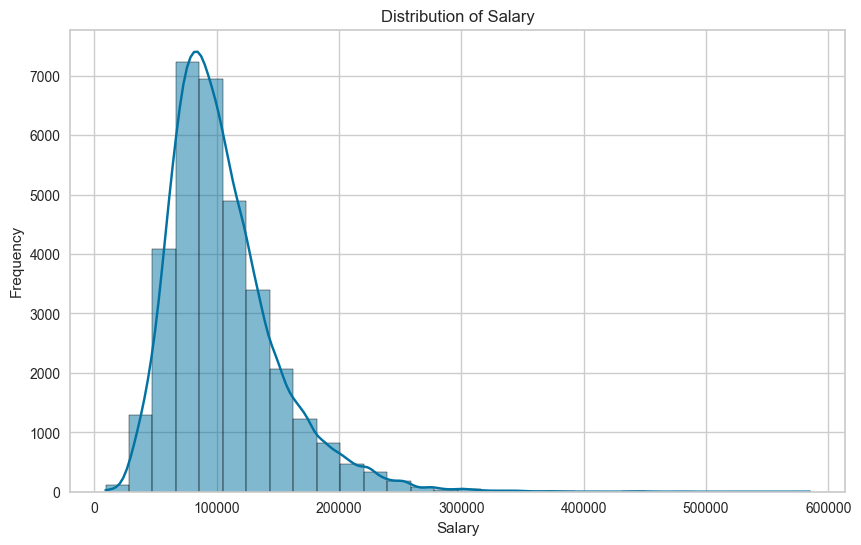

In [1920]:
# Visualizing target variable (salary)
plt.figure(figsize=(10, 6))
sns.histplot(train['Mean_Salary'], kde=True, bins=30)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [1921]:
# Identify all columns and missing values
print("\nMissing Values:")
print(train.isnull().sum())


Missing Values:
ID                      0
Job                     0
Jobs_Group              0
Profile             21107
Remote              19319
Company                 9
Location               13
City                 3824
State                3112
Frecuency_Salary        0
Mean_Salary             0
Skills                  0
Sector               7214
Sector_Group         7214
Revenue             18318
Employee            12799
Company_Score        8762
Reviews              8762
Director            20785
Director_Score      21924
URL                 16033
dtype: int64


In [1922]:
# Identify all columns and missing values in test
print("\nMissing Values:")
print(test.isnull().sum())


Missing Values:
ID                      0
Job                     0
Jobs_Group              0
Profile             14061
Remote              12822
Company                10
Location                8
City                 2625
State                2119
Frecuency_Salary        0
Skills                  0
Sector               4735
Sector_Group         4735
Revenue             12022
Employee             8418
Company_Score        5828
Reviews              5828
Director            13661
Director_Score      14464
URL                 10519
dtype: int64


In [1923]:
# Identify only columns with missing values
missing_data = data.isnull().sum()
print("\nColumns with Missing Values:")
print(missing_data[missing_data > 0])


Columns with Missing Values:
Series([], dtype: int64)


# 3. Data Cleaning for numeric columns (before encoding to avoid mean on ohe)

In [1924]:
# Identify numerical columns for train and test
train_numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
test_numerical_cols = test.select_dtypes(include=['int64', 'float64']).columns

print(test_numerical_cols)

Index(['Company_Score', 'Reviews', 'Director_Score'], dtype='object')


In [1925]:
# Function to impute missing values for numerical columns
def impute_numeric_col(data, numerical_cols):
    """
    Impute missing values in the specified numerical columns of a DataFrame with the mean.

    Parameters:
        data (pd.DataFrame): The DataFrame containing numerical columns.
        numerical_cols (list): List of numerical column names to impute.

    Returns:
        pd.DataFrame: The DataFrame with imputed numerical columns.
    """
    numerical_imputer = SimpleImputer(strategy='mean')
    data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])
    return data

# Identify numerical columns for train and test
train_numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
test_numerical_cols = test.select_dtypes(include=['int64', 'float64']).columns

# Impute missing values for train and test numerical columns
train = impute_numeric_col(train, train_numerical_cols)
test = impute_numeric_col(test, test_numerical_cols)

# Display the results
print("Imputed Train Data:")
train.head()

Imputed Train Data:


,ID,Job,Jobs_Group,Profile,Remote,Company,Location,City,State,Frecuency_Salary,...,Skills,Sector,Sector_Group,Revenue,Employee,Company_Score,Reviews,Director,Director_Score,URL
0,job_f2c807527f687b96,"Part-time Reporting Business Analyst, Data & A...",Financial Analyst,NaN,Remote,Sandy Hook Promise Foundation,Remote,NaN,NaN,hour,...,"['Salesforce', 'Bachelor']",NGOs and Nonprofit Organizations,Nonprofit Organizations,NaN,XS,4.2,20.0,NaN,0.748707,https://www.sandyhookpromise.org/
1,job_2660d4c53505af10,Controller,Controller,NaN,NaN,Building Service 32BJ Benefit Funds,"New York, NY 10013 (Tribeca area)",New York,NY,year,...,"['SQL', 'Master', 'Dynamics 365', 'Snowflake',...",NGOs and Nonprofit Organizations,Nonprofit Organizations,NaN,M,3.5,58.0,"Peter Goldberger, Executive Director",0.700000,NaN
2,sj_50358c44328ae06a,Sr Finance Analyst,Financial Analyst,Senior,NaN,LCS,NaN,NaN,NaN,year,...,"['Word', 'Bachelor', 'Excel']",Personal Consumer Services,Sales,XXXS,XXXS,3.4,88.0,NaN,0.748707,NaN
3,job_a087fd700e3e85f0,Senior Business Intelligence Analyst,Business Intelligence,Senior,Hybrid,Federal Reserve Bank of Richmond,"Richmond, VA 23219 (Central Office area)",Richmond,VA,year,...,"['PowerPoint', 'Power BI', 'Tableau', 'Word', ...",Banking and Credit Services,Finance,XXL,XL,3.8,30.0,Tom Barkin,0.700000,https://www.richmondfed.org/
4,job_d2a2538a2c4d2033,Data Center Operations Analyst (Temporary Assi...,Operations Analyst,NaN,Remote,Los Angeles County Office of Education,"Downey, CA 90242+1 ubicación",Downey,CA,hour,...,['Office'],State and Regional Agencies,Government,NaN,XL,4.2,186.0,Debra Duardo,0.850000,NaN


In [1926]:

print("\nImputed Test Data:")
test.head()


Imputed Test Data:


,ID,Job,Jobs_Group,Profile,Remote,Company,Location,City,State,Frecuency_Salary,Skills,Sector,Sector_Group,Revenue,Employee,Company_Score,Reviews,Director,Director_Score,URL
0,sj_99ad4f80ae7f4835,Business Analyst Manager,Business Analyst,Lead,Remote,Dryden Mutual Insurance Company,"Dryden, NY 13053",Dryden,NY,year,"['PowerPoint', 'Office', 'Excel', 'Agile']",Insurance Companies and Investment Societies,Insurance,NaN,NaN,5.000000,2.000000,NaN,0.746766,NaN
1,job_6ff7f1a7c400916a,Senior Program Budget Analyst,Financial Analyst,Senior,NaN,Esphera Concepts,"Washington, DC+1 location",Washington,DC,year,"['PowerPoint', 'Master', 'Word', 'Bachelor', '...",Management and Consulting,Consulting,NaN,XS,3.654609,2593.057045,NaN,0.746766,https://www.espheraconcepts.com/
2,job_e059d20eba88b17a,Senior AI Engineer - Multi-year CONTRACT ROLE ...,ML/AI Engineer,Senior,Hybrid,Volkswagen Group of America - Chattanooga...,"Belmont, CA",Belmont,CA,year,"['Tensor Flow', 'Python', 'Master', 'PhD', 'C+...",NaN,NaN,NaN,NaN,3.654609,2593.057045,NaN,0.746766,NaN
3,job_79f7953813b13358,"Data Scientist, Algorithmic Recommendations",Data Scientist,NaN,Remote,The New York Times,Remote,NaN,NaN,year,"['Google Cloud', 'Python', 'SQL', 'PhD']",Audiovisual and Media Communications,Media Communications,XL,XL,4.000000,275.000000,Meredith Kopit Levien,0.780000,https://www.nytimes.com/
4,job_892dfe86b96f322b,Management & Budget Analyst-Finance,Financial Analyst,NaN,NaN,Metropolitan Government of Nashville & Davidso...,"Nashville, TN",Nashville,TN,year,"['PowerPoint', 'Master', 'Word', 'Excel', 'Bac...",NaN,NaN,NaN,NaN,3.654609,2593.057045,NaN,0.746766,NaN


In [1927]:
# Check imputatoin of mean worked

train_numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
test_numerical_cols = test.select_dtypes(include=['int64', 'float64']).columns

print(train[train_numerical_cols].isnull().sum())
print(test[test_numerical_cols].isnull().sum())

Mean_Salary       0
Company_Score     0
Reviews           0
Director_Score    0
dtype: int64
Company_Score     0
Reviews           0
Director_Score    0
dtype: int64


# 3. Feature Selection (Put back in below randomforest feature selectoin dont delete)

In [1928]:
# Separate features and target
X = train.drop(columns=['Mean_Salary'])  # Features
y = train['Mean_Salary']                # Target variable

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Encode categorical variables temporarily
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']).columns:
    X_encoded[col], _ = X_encoded[col].factorize()

# Train a Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_encoded, y)

# Get feature importance scores
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top features
print("Top Features Based on Random Forest Importance:")
print(feature_importances.head(20))

In [1929]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Use a linear model to rank features
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=10)
rfe.fit(X_encoded, y)

# Get rankings of features
rfe_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()
print("Top Features Based on RFE:")
print(rfe_ranking.head(20))

Top Features Based on RFE:
Frecuency_Salary     1
Jobs_Group           1
Profile              1
Remote               1
Company_Score        1
State                1
Director_Score       1
Sector_Group         1
Revenue              1
Employee             1
Sector               2
City                 3
Skills               4
Director             5
Company              6
URL                  7
Reviews              8
Location             9
Job                 10
ID                  11
dtype: int32


# 3.1 Flatten multivalued columns

In [1930]:
#check for multi or single values in rows! 
def check_column_values(data):
    """
    Checks each column in a DataFrame to determine if it contains single values or multivalues.
    
    Parameters:
        data (pd.DataFrame): The DataFrame to check.
        
    Returns:
        str: A string listing each column and its classification ('single' or 'multivalue') on a new line.
    """
    results = []
    
    for col in data.columns:
        # Get unique rows for the column and analyze them
        unique_values = data[col].dropna().unique()  # Ignore NaN
        
        # Check if any value in the column contains multivalues
        is_multivalue = False
        for value in unique_values:
            if isinstance(value, str):  # Check if it's a string
                # If the string contains characters indicative of multivalues (e.g., ',' or brackets)
                if ',' in value or '[' in value or ']' in value or '{' in value or '}' in value:
                    is_multivalue = True
                    break
        
        classification = 'multivalue' if is_multivalue else 'single'
        results.append(f"{col}: {classification}")
    
    return "\n".join(results)

result = check_column_values(train)
print(result)

ID: single
Job: multivalue
Jobs_Group: single
Profile: single
Remote: single
Company: multivalue
Location: multivalue
City: single
State: single
Frecuency_Salary: single
Mean_Salary: single
Skills: multivalue
Sector: multivalue
Sector_Group: single
Revenue: single
Employee: single
Company_Score: single
Reviews: single
Director: multivalue
Director_Score: single
URL: single


In [1931]:
#Count the amount of unique values in multivalue columns
def count_unique_multivalues(df, multivalue_columns):
    """
    Counts unique values across multivalued columns.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing multivalued columns.
        multivalue_columns (list): List of column names to process.
    
    Returns:
        dict: A dictionary with column names as keys and counts of unique values as values.
    """
    unique_counts = {}
    
    for col in multivalue_columns:
        # Flatten all values in the column
        all_values = []
        
        for row in df[col].dropna():
            if isinstance(row, str):  # Check if it's a string
                # Split by common delimiters like ',' or whitespace
                values = row.replace('[', '').replace(']', '').replace("'", '').split(',')
                all_values.extend([v.strip() for v in values])  # Strip whitespace
            
        # Count unique values
        unique_counts[col] = len(set(all_values))
    
    return unique_counts


# List of multivalued columns
multivalue_columns = ["Skills", "Location", "Sector", "Company", "Job", "Sector", "Director"]

# Get unique counts
unique_counts = count_unique_multivalues(train, multivalue_columns)

# Display results
print("Unique values in multivalued columns:")
for col, count in unique_counts.items():
    print(f"{col}: {count}")


Unique values in multivalued columns:
Skills: 99
Location: 12737
Sector: 147
Company: 14145
Job: 18028
Director: 2718


In [1932]:
#Flatten Columns you would like to based on feature selection and unique value count
def rearrange_dataset(train, test):
    #1.train 
    skills_list = []
    for i in range(len(train)):
        zip_list = train['Skills'][i].replace('[','').replace(']','').replace("'",'').replace(" ",'').split(',')
        dict_temp = {}
        str_ = ''
        for j in range(len(zip_list)):
            dict_temp[zip_list[j]] = 1
            str_ += zip_list[j] + " "
        dict_temp['skills_clean'] = str_    
        skills_list.append(dict_temp)
        
    train = pd.concat([train,pd.DataFrame(skills_list).fillna(0)],axis =1)  

    #1.test 
    skills_list = []
    for i in range(len(test)):
        zip_list = test['Skills'][i].replace('[','').replace(']','').replace("'",'').replace(" ",'').split(',')
        dict_temp = {}
        str_ = ''
        for j in range(len(zip_list)):
            dict_temp[zip_list[j]] = 1
            str_ += zip_list[j] + " "
        dict_temp['skills_clean'] = str_    
        skills_list.append(dict_temp)
        
    test = pd.concat([test,pd.DataFrame(skills_list).fillna(0)],axis =1)  
    
    
    return train, test

In [1933]:
%%time
train, test = rearrange_dataset(train, test)

CPU times: total: 172 ms
Wall time: 569 ms


In [1934]:
train.describe()

,Mean_Salary,Company_Score,Reviews,Director_Score,Salesforce,Bachelor,SQL,Master,Dynamics365,Snowflake,...,Japanese,Chinese,German,Sisense,Kaggle,Streamlit,Plotly,Hindi,Russian,Polars
count,33248.000000,33248.000000,33248.000000,33248.000000,33248.000000,33248.000000,33248.000000,33248.000000,33248.00000,33248.000000,...,33248.000000,33248.000000,33248.000000,33248.000000,33248.000000,33248.000000,33248.000000,33248.000000,33248.000000,33248.000000
mean,104938.652004,3.659287,2724.875398,0.748707,0.031160,0.640911,0.264948,0.181545,0.01564,0.029897,...,0.001474,0.001895,0.001865,0.000692,0.000331,0.000692,0.001624,0.000150,0.000361,0.000180
std,43891.461738,0.540266,11444.908718,0.064679,0.173752,0.479741,0.441312,0.385475,0.12408,0.170304,...,0.038362,0.043489,0.043143,0.026293,0.018186,0.026293,0.040269,0.012262,0.018995,0.013433
min,9200.000000,1.000000,1.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75000.000000,3.500000,30.000000,0.748707,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,96600.000000,3.659287,512.000000,0.748707,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,125000.000000,3.900000,2724.875398,0.748707,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,585000.000000,5.000000,247915.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1935]:
test.describe

<bound method NDFrame.describe of                          ID  \
0       sj_99ad4f80ae7f4835   
1      job_6ff7f1a7c400916a   
2      job_e059d20eba88b17a   
3      job_79f7953813b13358   
4      job_892dfe86b96f322b   
...                     ...   
22161  job_4ab2e5201b60cc15   
22162  job_b3a7cf40a22659ef   
22163  job_4e69acaf903b0276   
22164  job_816f279ea500ecd0   
22165  job_9861d87455c4a6a6   

                                                     Job         Jobs_Group  \
0                               Business Analyst Manager   Business Analyst   
1                          Senior Program Budget Analyst  Financial Analyst   
2      Senior AI Engineer - Multi-year CONTRACT ROLE ...     ML/AI Engineer   
3            Data Scientist, Algorithmic Recommendations     Data Scientist   
4                    Management & Budget Analyst-Finance  Financial Analyst   
...                                                  ...                ...   
22161                                   


# Check for missing values in categorical columns
categorical_missing = X[categorical_cols].isnull().sum()

# Filter to show only columns with missing values
categorical_missing = categorical_missing[categorical_missing > 0]

# Print the results
print("Categorical Columns with Missing Values:")
print(categorical_missing)

# Replace missing values in categorical columns with "unknown"
for col in categorical_cols:
    X[col] = X[col].fillna('unknown')

# Verify the replacements
print("Missing Values After Replacement:")
print(X[categorical_cols].isnull().sum())

# 5. Encoding features separately

# Check unique elements in each categorical column
categorical_cols = X.select_dtypes(include=['object']).columns

# Count the number of unique values in each categorical column
unique_counts = {col: X[col].nunique() for col in categorical_cols}

# Convert to a DataFrame for better visualization
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Feature', 'Unique Categories'])
unique_counts_df = unique_counts_df.sort_values(by='Unique Categories', ascending=False)

# Display the result
print("Unique Categories in Categorical Columns:")
print(unique_counts_df)

# Define thresholds for encoding methods
one_hot_threshold = 139  # Adjust based on your use case
# Split the features
low_cardinality_cols = unique_counts_df[unique_counts_df['Unique Categories'] <= one_hot_threshold]['Feature'].tolist()
high_cardinality_cols = unique_counts_df[unique_counts_df['Unique Categories'] > one_hot_threshold]['Feature'].tolist()

# Display the splits
print("\nLow-Cardinality Features (One-Hot Encoding):")
print(low_cardinality_cols)

print("\nHigh-Cardinality Features (Label/Target Encoding):")
print(high_cardinality_cols)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Apply One-Hot Encoding to low-cardinality columns
encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, low_cardinality_cols)
    ], remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(X)

from sklearn.preprocessing import LabelEncoder

for col in high_cardinality_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

for col in high_cardinality_cols:
    freq_map = X[col].value_counts(normalize=True).to_dict()
    X[col] = X[col].map(freq_map)

# 4. Train-Test Split

# 5. Train and Evaluate a Effective Model using PyCaret

from pycaret.regression import *
import pandas as pd

# Initialize PyCaret
regression_setup = setup(
    data=train,
    target='Mean_Salary',            # Target variable
    train_size=0.8,                  # 80-20 train-test split within PyCaret
    normalize=True,                  # Ensure features are scaled
    max_encoding_ohe=139,             # Set threshold for one-hot encoding
    session_id=42,                   # For reproducibility
)

# Compare Models
best_model = compare_models(sort='MAPE')

# Tune the Best Model
tuned_model = tune_model(best_model, optimize='MAPE')

# Finalize and Save the Model
final_model = finalize_model(tuned_model)

# Display the performance of the tuned model
print("\nTuned Model Performance:")
evaluate_model(final_model)

import joblib

export_model = final_model

# Save the CatBoost model
joblib.dump(export_model, 'exported_models.pkl')

test.to_csv("processed_test_data.csv", index=False)

# 1. Run model on test data

In [1936]:
# Keep the 'ID' column for submission
ids = test['ID']

In [1937]:
import joblib 

loaded_model = joblib.load('exported_models.pkl')

In [1938]:
train.shape

(33248, 121)

In [1939]:
test.shape

(22166, 120)

In [1940]:
print(len(test))

22166


In [1941]:
# Drop target column if present in test
if 'Mean_Salary' in test.columns:
    test = test.drop(columns=['Mean_Salary'])


In [1942]:
# Generate predictions
test_predictions = loaded_model.predict(test)


In [1943]:
# Create the submission DataFrame
submission = pd.DataFrame({
    'ID': ids,
    'Mean_Salary': test_predictions
})

In [1944]:
submission.to_csv("submission.csv", index=False)